# **Análisis del Riesgo Financiero de NVIDIA (NVDA) usando Value at Risk (VaR) y Expected Shortfall (ES)**  

En este proyecto, se realizó un **análisis del riesgo financiero** asociado con las acciones de **NVIDIA Corporation (NVDA)** utilizando datos históricos obtenidos de **Yahoo Finance**.  
Se emplearon dos de las principales métricas utilizadas en la industria financiera: **Value at Risk (VaR)** y **Expected Shortfall (ES)**.  
Estas herramientas permiten a inversores y gestores de portafolios cuantificar y gestionar el riesgo de pérdidas en los mercados financieros.  

## **📌 Value at Risk (VaR) y Expected Shortfall (ES)**  
El **Value at Risk (VaR)** mide la **pérdida máxima esperada** durante un horizonte temporal específico con un determinado nivel de confianza (por ejemplo, 95%).  
A través de diferentes métodos —**histórico, paramétrico y simulación de Monte Carlo**—, se evaluó el VaR de las acciones de **NVDA** para comprender la magnitud de las posibles pérdidas en condiciones normales de mercado.  

Complementando este análisis, se calculó el **Expected Shortfall (ES)**, que ofrece una **medida más robusta** al estimar la **pérdida promedio** en los escenarios donde se excede el VaR.  
De esta forma, se obtiene una visión más completa del riesgo, especialmente en **eventos extremos o en situaciones de alta volatilidad**.  

---

## **📊 Atributos de la Data Utilizada:**  

- **`Adj Close` (Precio de cierre ajustado):** Refleja el precio de cierre de la acción, pero modificado para tener en cuenta eventos corporativos como dividendos, splits de acciones o nuevas emisiones.  
- **`Close` (Precio de cierre):** Último precio al que se negociaron las acciones durante el horario normal del mercado. No toma en cuenta ajustes por dividendos o splits.  
- **`High` (Precio máximo):** Precio más alto al que se negociaron las acciones durante una sesión de mercado.  
- **`Low` (Precio mínimo):** Precio más bajo al que se negociaron las acciones durante una sesión de mercado.  
- **`Open` (Precio de apertura):** Precio al que se realizó la primera transacción de la acción al inicio de la sesión de mercado.  
- **`Volume` (Volumen):** Representa el número total de acciones negociadas durante una sesión de mercado.  
- **`Return` (Retorno):** Mide el cambio porcentual en el precio de cierre ajustado de un día a otro.  

---

## **📂 Contenido del Proyecto:**  

1. **Carga y revisión de datos** 📥  
2. **Resumen de datos estadísticos** 📊  
3. **Limpieza y procesamiento de datos** 🧹
4. **Visualizacion de datos** 📌
5. **Cálculo de VaR y backtesting** 🔍  
6. **Cálculo del Expected Shortfall (ES)** 📉  
7. **Conclusiones y análisis de riesgo** 💡  


---




# **1. Carga y revisión de datos** 📥  

In [127]:
# Paquetes a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 
from scipy.stats import t
!pip install yfinance
import yfinance as yf

In [8]:
# Descarga de los datos de NVDA (NVIDIA)
data = yf.download("NVDA", start="2015-01-01", end="2023-01-01")
data.head()  # Nos muestra los primeros registros

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2015-01-02,0.483144,0.486744,0.475463,0.483144,113680000
2015-01-05,0.474983,0.484584,0.472823,0.483144,197952000
2015-01-06,0.460582,0.476183,0.460102,0.475703,197764000
2015-01-07,0.459382,0.468023,0.457942,0.463943,321808000
2015-01-08,0.476663,0.479543,0.464423,0.464663,283780000


# **2. Resumen de datos estadísticos** 📊 

In [19]:
#  Primeras filas 
print(data.head())

# Información general 
print(data.info())

# Resumen estadístico
print(data.describe())

Price          Close      High       Low      Open     Volume
Ticker          NVDA      NVDA      NVDA      NVDA       NVDA
Date                                                         
2015-01-02  0.483144  0.486744  0.475463  0.483144  113680000
2015-01-05  0.474983  0.484584  0.472823  0.483144  197952000
2015-01-06  0.460582  0.476183  0.460102  0.475703  197764000
2015-01-07  0.459382  0.468023  0.457942  0.463943  321808000
2015-01-08  0.476663  0.479543  0.464423  0.464663  283780000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2014 entries, 2015-01-02 to 2022-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NVDA)   2014 non-null   float64
 1   (High, NVDA)    2014 non-null   float64
 2   (Low, NVDA)     2014 non-null   float64
 3   (Open, NVDA)    2014 non-null   float64
 4   (Volume, NVDA)  2014 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 94.4 KB
None
Price    

- **Valores Promedio:**  
  El precio promedio de las acciones de **NVIDIA (NVDA)** durante este período oscila entre **7.78 y 8.09 USD**, reflejando el rango en el que se ha movido el valor de la acción a lo largo del tiempo.  

- **Valores Extremos:**  
  - **Precio máximo:** **34.58 USD** en el precio de cierre.  
  - **Precio mínimo:** **0.46 USD** en el precio de apertura.  
  - **Conclusión:** Se observa un crecimiento **significativo** en el valor de las acciones de **NVIDIA** durante estos años. 🚀  

- **Diferencia entre `Close` y `Adj Close`:**  
  - El precio de cierre ajustado suele ser **ligeramente inferior** al precio de cierre estándar debido a ajustes como **dividendos y splits de acciones**.  

- **Volumen de Transacciones:**  
  - El volumen promedio diario de transacciones es de aproximadamente **478.2 millones de acciones**.  
  - En ciertos momentos, el volumen alcanzó un pico de **3.69 mil millones de acciones**, lo cual indica momentos de **alta actividad y volatilidad en el mercado**.  

---

## **📊 Distribución de los Datos**
- **Alta Variabilidad en los Precios:**  
  - La **desviación estándar** de aproximadamente **7.5 USD** en todas las columnas de precios indica **fluctuaciones significativas** en los valores de las acciones durante estos años.  

- **Distribución Cuartílica:**  
  - **25% de los precios** estuvieron por debajo de **2.47 USD**, indicando valores bajos en los primeros años del análisis.  
  - **Mediana (50%)** alrededor de **5.26 USD**, mostrando un **aumento consistente** en los valores de las acciones.  
  - **75% de los precios** superaron los **13.35 USD**, lo que confirma una **tendencia de crecimiento sostenida**.  

📈 **Conclusión:** El análisis de estas estadísticas sugiere que las acciones de **NVIDIA han experimentado un crecimiento significativo**, con **altos niveles de volatilidad y actividad en el mercado**. Esto hace que sea crucial un estudio detallado de **Value at Risk (VaR) y Expected Shortfall (ES)** para evaluar el riesgo financiero.  

# **3. Limpieza y procesamiento de datos** 🧹 

In [24]:
# Verificamos valores nulos
print(data.isnull().sum())

Price   Ticker
Close   NVDA      0
High    NVDA      0
Low     NVDA      0
Open    NVDA      0
Volume  NVDA      0
dtype: int64


## **📌 Análisis de Valores Nulos y Cálculo de Return**  

Las columnas **`Close`**, **`High`**, **`Low`**, **`Open`** y **`Volume`** no tienen valores nulos.  
Esto indica que los datos están **completos** y no es necesario realizar imputaciones. ✅  

### **📌 Cálculo de `Return`**
#### **¿Por qué tengo que calcularlo?**  
El **return** nos indica cuánto ha ganado o perdido un inversor en un activo en un período de tiempo específico.  
Nos sirve para **tomar decisiones informadas** sobre si mantener, comprar o vender un activo, y es con esta variable que realizaremos los cálculos de riesgo financiero.  

In [27]:
#Columnas del DataFrame
print(data.columns)

MultiIndex([( 'Close', 'NVDA'),
            (  'High', 'NVDA'),
            (   'Low', 'NVDA'),
            (  'Open', 'NVDA'),
            ('Volume', 'NVDA')],
           names=['Price', 'Ticker'])


In [33]:
# Acceso a la columna 'Close' de NVDA
close_nvda = data[('Close', 'NVDA')]

# Tipo de dato
print(close_nvda.dtype)

# Valores nulos
print(close_nvda.isnull().sum())


float64
0


In [35]:
# Cálculo de los retornos logarítmicos
data[('Return', 'NVDA')] = np.log(data[('Close', 'NVDA')] / data[('Close', 'NVDA')].shift(1))

# Resultados
print(data[[('Close', 'NVDA'), ('Return', 'NVDA')]].head())


Price          Close    Return
Ticker          NVDA      NVDA
Date                          
2015-01-02  0.483144       NaN
2015-01-05  0.474983 -0.017035
2015-01-06  0.460582 -0.030787
2015-01-07  0.459382 -0.002609
2015-01-08  0.476663  0.036927


# **4. Visualizacion de datos** 📌

**Precio de cierre de NVIDIA (NVDA) entre 2015 y 2023**

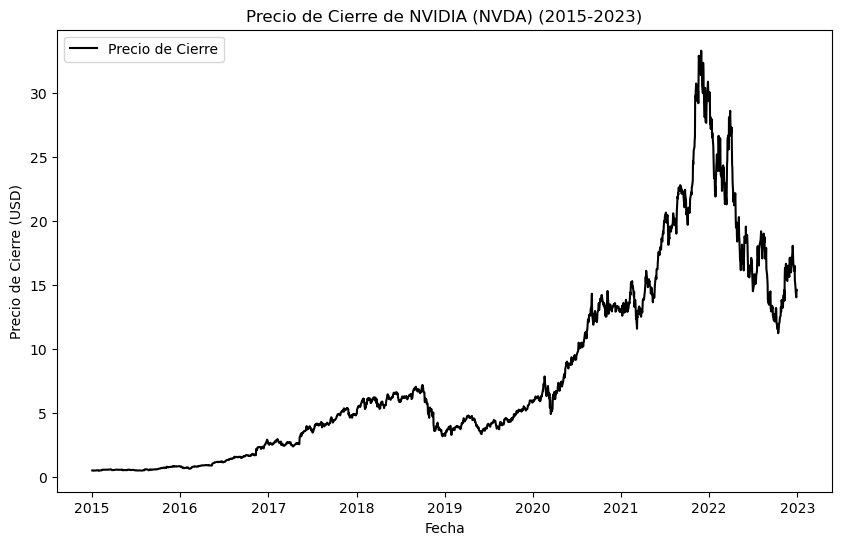

In [58]:
# Gráfico del precio de cierre a lo largo del tiempo
plt.figure(figsize=(10,6))
plt.plot(data[('Close', 'NVDA')], color='black', label='Precio de Cierre')

# Configuración del gráfico
plt.title('Precio de Cierre de NVIDIA (NVDA) (2015-2023)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.show()

El gráfico muestra la evolución del **precio de cierre** de **NVIDIA (NVDA)** entre **2015 y 2023**.  
Se observa un crecimiento significativo a partir de **2020**, alcanzando su punto más alto en **2021-2022**, seguido de una **corrección del mercado**.  
Estos cambios reflejan periodos de **alta volatilidad**, lo que hace fundamental un análisis de **riesgo financiero** como el **VaR y Expected Shortfall (ES)**. 🚀📈 

**Volumen de Transacción de NVIDIA (NVDA) (2015-2023)**

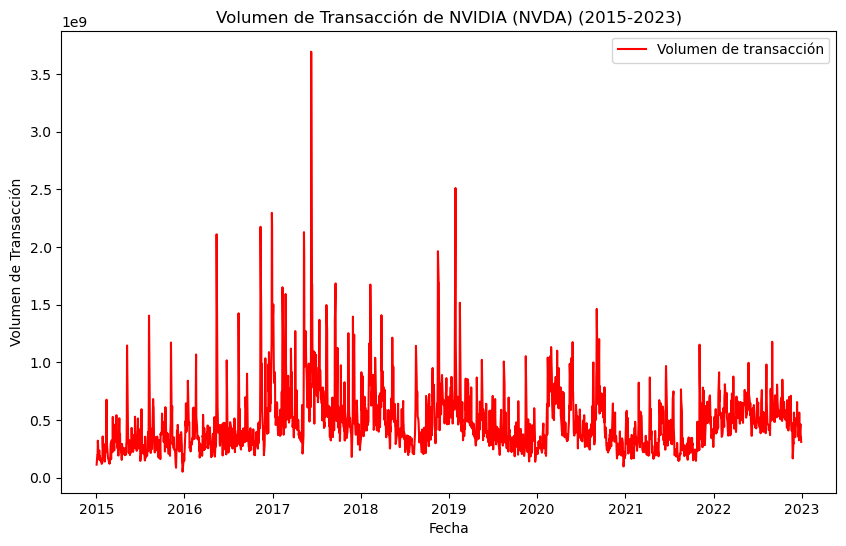

In [60]:
# Gráfico del volumen de transacciones
plt.figure(figsize=(10,6))
plt.plot(data[('Volume', 'NVDA')], color='red', label='Volumen de transacción')

# Configuración del gráfico
plt.title('Volumen de Transacción de NVIDIA (NVDA) (2015-2023)')
plt.xlabel('Fecha')
plt.ylabel('Volumen de Transacción')
plt.legend()
plt.show()

El gráfico muestra la evolución del **volumen de transacciones** de **NVIDIA (NVDA)** entre **2015 y 2023**.  
Se observan picos significativos en **2017 y 2019**, lo que indica **momentos de alta actividad en el mercado**.  
A partir de **2020**, el volumen se mantiene en niveles más estables, aunque con variaciones en periodos de volatilidad.  
Estos cambios reflejan el interés de los inversores en distintos momentos clave, por lo que su análisis es esencial en la evaluación del riesgo. 📈🔍

**Matriz de correlación entre todas las variables numéricas.**

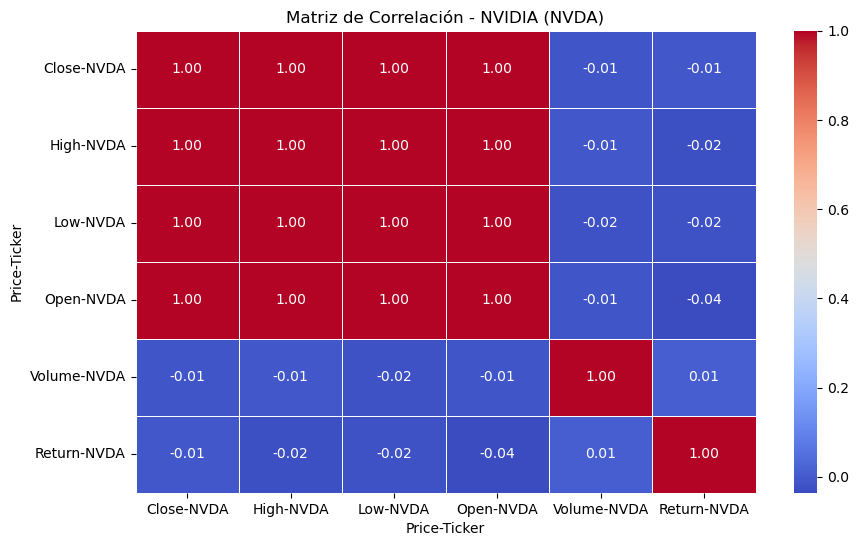

In [67]:
# Calcular la matriz de correlación
corr = data.corr()

# Mostrar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Configuración del título
plt.title('Matriz de Correlación - NVIDIA (NVDA)')
plt.show()

La matriz de correlación muestra las relaciones entre las variables **`Close`**, **`High`**, **`Low`**, **`Open`**, **`Volume`** y **`Return`** de **NVIDIA (NVDA)**.  

### **📌 Observaciones clave:**  
- Existe una **correlación perfecta (1.00) entre `Close`, `High`, `Low` y `Open`**, lo que indica que estos precios están altamente relacionados y se mueven en la misma dirección.  
- El **volumen (`Volume`) no presenta una fuerte correlación con los precios**, lo que sugiere que el volumen de transacciones no necesariamente impacta directamente en los movimientos del precio de la acción.  
- Los **retornos (`Return`) tienen una correlación baja con el volumen y los precios**, lo cual es normal, ya que los retornos dependen de cambios en el precio relativo y no directamente de sus valores absolutos.  

📌 **Conclusión:**  
Los precios de **NVIDIA (NVDA)** están fuertemente correlacionados entre sí, mientras que el volumen y los retornos presentan una menor relación con estos valores.  
Este análisis es clave para entender la **dinámica del mercado** y cómo cada variable puede influir en la toma de decisiones financieras. 🚀📈  

**Volatilidad de los retornos diarios de NVIDIA (NVDA) entre 2015 y 2023**

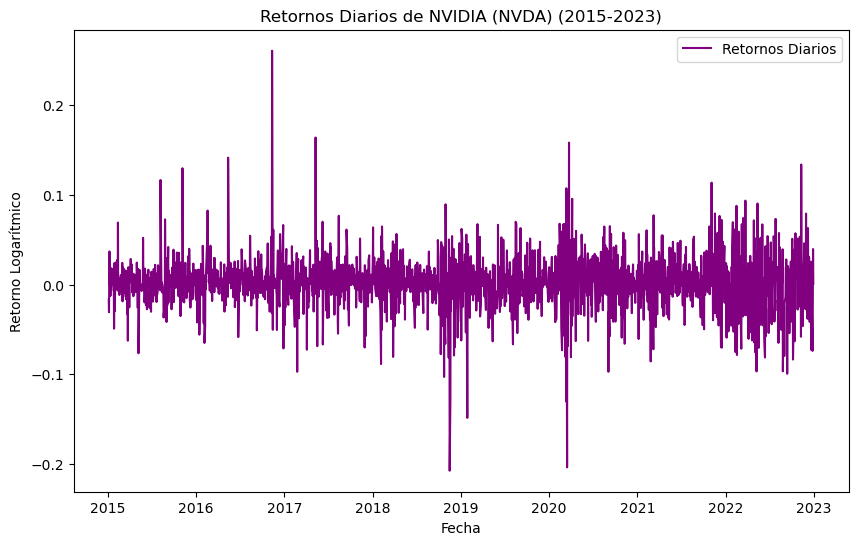

In [72]:
# Gráfico de los retornos logarítmicos a lo largo del tiempo
plt.figure(figsize=(10,6))
plt.plot(data.index, data[('Return', 'NVDA')], label='Retornos Diarios', color='purple')

# Configuración del gráfico
plt.title('Retornos Diarios de NVIDIA (NVDA) (2015-2023)')
plt.xlabel('Fecha')
plt.ylabel('Retorno Logarítmico')
plt.legend()
plt.show()

El gráfico muestra los **retornos logarítmicos diarios** de **NVIDIA (NVDA)** entre **2015 y 2023**.  

### **📌 Observaciones clave:**  
- Se observan períodos de **alta volatilidad**, especialmente alrededor de **2017, 2019 y 2020**, donde los retornos presentan **picos y caídas significativas**.  
- A partir de **2020**, la volatilidad parece **aumentar**, con variaciones más frecuentes en los retornos.  
- Existen **eventos extremos** donde los retornos alcanzan valores fuera del rango habitual, lo que indica momentos de alta incertidumbre en el mercado.  

📌 **Conclusión:**  
Los retornos diarios de **NVIDIA (NVDA)** reflejan **cambios bruscos en su valor**, lo que hace necesario un análisis más detallado del **riesgo financiero** utilizando métricas como **Value at Risk (VaR) y Expected Shortfall (ES)**. 🚀📉 

**Distribución de los retornos diarios de NVIDIA (NVDA).**

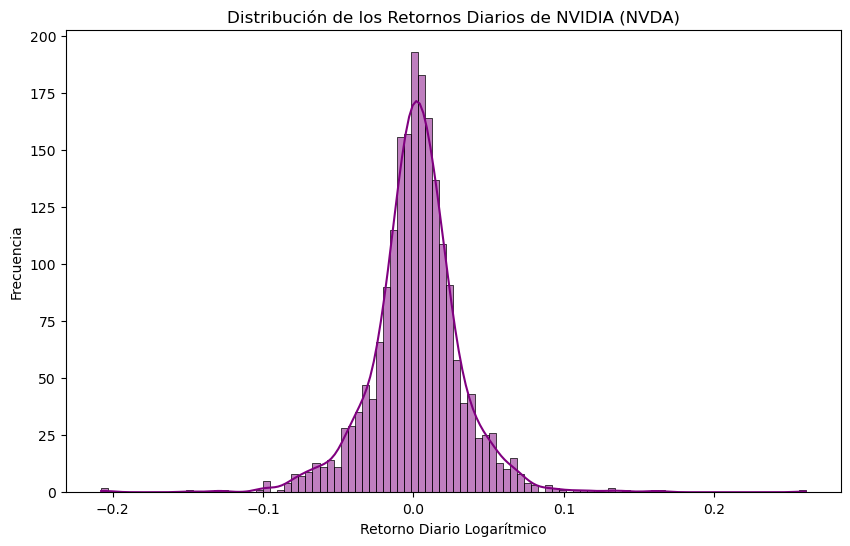

In [77]:
# Gráfico de la distribución de los retornos diarios
plt.figure(figsize=(10,6))
sns.histplot(data[('Return', 'NVDA')].dropna(), bins=100, kde=True, color='purple')

# Configuración del gráfico
plt.title('Distribución de los Retornos Diarios de NVIDIA (NVDA)')
plt.xlabel('Retorno Diario Logarítmico')
plt.ylabel('Frecuencia')
plt.show()

### **📌 Observaciones clave:**  
- La distribución tiene una **forma aproximadamente normal**, con una gran concentración de retornos cercanos a **0**.  
- Existen **colas largas** en ambos extremos, lo que indica la presencia de **eventos extremos** o días con variaciones atípicas en los retornos.  
- Se observa una ligera **asimetría**, lo que sugiere que los retornos negativos podrían ser más pronunciados que los positivos.  
- La presencia de **picos en la densidad** alrededor de valores cercanos a cero indica **baja volatilidad en la mayoría de los días**, con algunos episodios de alta fluctuación.  

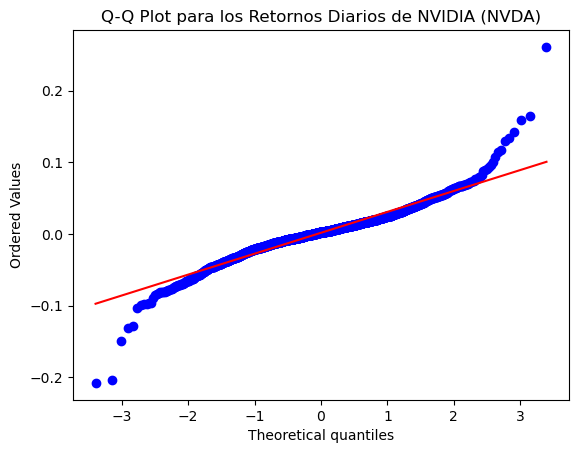

In [86]:
# Crear el Q-Q plot para los retornos de NVIDIA
stats.probplot(data[('Return', 'NVDA')].dropna(), dist="norm", plot=plt)

# Configuración del gráfico
plt.title('Q-Q Plot para los Retornos Diarios de NVIDIA (NVDA)')
plt.show()

### **📌 Observaciones clave:**  
- La mayor parte de los puntos se alinean con la **línea roja**, lo que sugiere que los retornos **siguen una distribución aproximadamente normal** en su rango central.  
- **Desviaciones en los extremos:** En los cuantiles más altos y más bajos, los puntos **se desvían significativamente** de la línea roja.  
  - Esto indica la **presencia de colas pesadas**, lo que significa que hay más eventos extremos (grandes ganancias o pérdidas) de los esperados en una distribución normal.  
- Los retornos tienen **un comportamiento leptocúrtico**, con más valores extremos de lo que una normal estándar predeciría.  

**Volatilidad de NVIDIA (NVDA)**

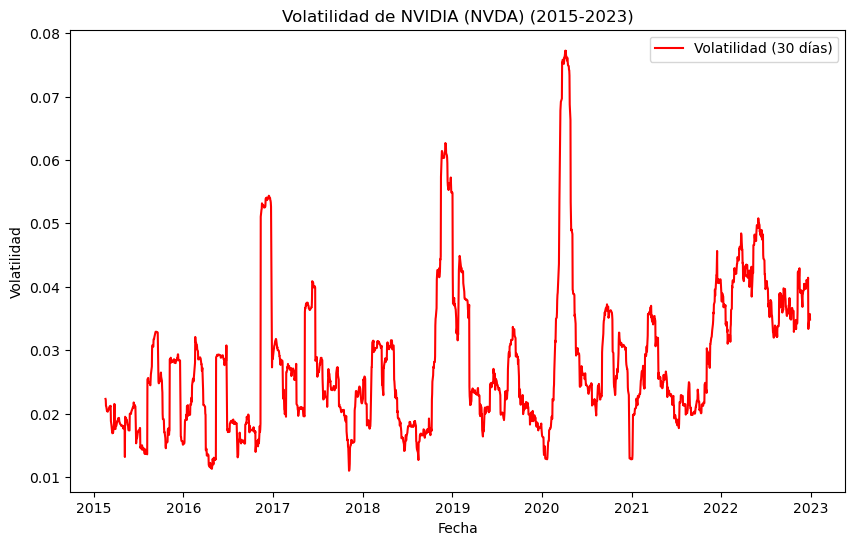

In [99]:
# Cálculo de la volatilidad (desviación estándar móvil de 30 días)
data[('Volatility', 'NVDA')] = data[('Return', 'NVDA')].rolling(window=30).std()

# Gráfico de la volatilidad
plt.figure(figsize=(10,6))
plt.plot(data.index, data[('Volatility', 'NVDA')], label='Volatilidad (30 días)', color='red')

# Configuración del gráfico
plt.title('Volatilidad de NVIDIA (NVDA) (2015-2023)')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad')
plt.legend()
plt.show()

### **📌 Observaciones clave:**  
- Se observan **picos de volatilidad significativos** en **2017, 2019 y 2020**, lo que indica períodos de **alta incertidumbre y cambios abruptos en el mercado**.  
- El mayor aumento en la volatilidad ocurrió alrededor de **2020**, lo que podría estar relacionado con eventos macroeconómicos o crisis de mercado.  
- Desde **2021 en adelante**, la volatilidad se mantiene en niveles relativamente altos en comparación con los primeros años del período analizado.  
- Períodos de **baja volatilidad** indican estabilidad en el precio de las acciones, mientras que los aumentos bruscos reflejan momentos de mayor riesgo y especulación en el mercado.  

**Sesgo y Curtosis**

In [106]:
# Cálculo de sesgo (asimetría) y curtosis para NVIDIA (NVDA)
skewness = data[('Return', 'NVDA')].skew()
kurtosis = data[('Return', 'NVDA')].kurtosis()

# Mostrar los resultados
print(f"Sesgo (Skewness): {skewness}")
print(f"Curtosis (Kurtosis): {kurtosis}")


Sesgo (Skewness): 0.02330543627157551
Curtosis (Kurtosis): 7.0773597473475025


- **Sesgo (Skewness):** `0.0233`  
  - El sesgo es **prácticamente nulo**, lo que indica que la distribución de los retornos de **NVIDIA (NVDA)** es **simétrica** en torno a la media.  
  - No hay una inclinación significativa hacia valores positivos o negativos.  
- **Curtosis (Kurtosis):** `7.0774`  
  - La curtosis es **mayor que 3**, lo que indica una **distribución leptocúrtica**.  
  - Esto significa que hay **colas más pesadas** en comparación con una distribución normal, lo que sugiere **mayor riesgo de eventos extremos** (altas ganancias o grandes pérdidas).  

# **5. Cálculo de VaR y backtesting**  🔍

**Método Histórico**

In [115]:
# Método Histórico
var_95 = np.percentile(data[('Return', 'NVDA')].dropna(), 5)
print(f"VaR Histórico al 95%: {var_95:.2%}")

VaR Histórico al 95%: -4.61%


**Método Paramétrico (Normal)**

In [119]:
mean = data[('Return', 'NVDA')].mean()
std_dev = data[('Return', 'NVDA')].std()
var_parametrico_95 = mean - 1.65 * std_dev
print(f"VaR Paramétrico al 95%: {var_parametrico_95:.2%}")

VaR Paramétrico al 95%: -4.81%


**Simulaciones de Monte Carlo**

In [129]:
df = 5  # Grados de libertad, ajustable según los datos
simulations = t.rvs(df, loc=mean, scale=std_dev, size=10000)
var_montecarlo_t_95 = np.percentile(simulations, 5)
print(f"VaR Monte Carlo con t al 95%: {var_montecarlo_t_95:.2%}")

VaR Monte Carlo con t al 95%: -5.81%


### **📌 Resultados:**  
- **VaR Histórico al 95%:** `-4.61%`  
  - Basado en los retornos históricos, en un 95% de los casos, la pérdida diaria no debería superar **4.61%**.  
- **VaR Paramétrico al 95%:** `-4.81%`  
  - Utilizando la media y la desviación estándar asumiendo una distribución normal, la pérdida esperada es **ligeramente mayor** a la del método histórico.  
- **VaR Monte Carlo con distribución t al 95%:** `-5.81%`  
  - La simulación de Monte Carlo, que captura mejor **colas pesadas y eventos extremos**, estima una pérdida mayor de hasta **5.81%**, reflejando un mayor riesgo de variaciones extremas.  

---

### **📌 Comparación y Conclusión**  
- El **VaR Monte Carlo** predice la mayor pérdida esperada, lo que indica la importancia de **considerar eventos extremos** en la gestión de riesgos.  
- El **VaR Paramétrico** y el **VaR Histórico** ofrecen valores similares, pero el **paramétrico tiende a subestimar los riesgos en presencia de colas pesadas**.  
- Dado que la distribución de los retornos de **NVIDIA (NVDA) presenta curtosis alta**, el uso del método de **Monte Carlo** es clave para capturar estos riesgos adicionales.  

**Backtesting para el método histórico de VaR:**

In [136]:
# Cálculo del backtesting para método histórico
violations_historic = data[('Return', 'NVDA')] < -var_95
num_violations_historic = violations_historic.sum()
print(f"Número de violaciones del VaR: {num_violations_historic}")

Número de violaciones del VaR: 1896


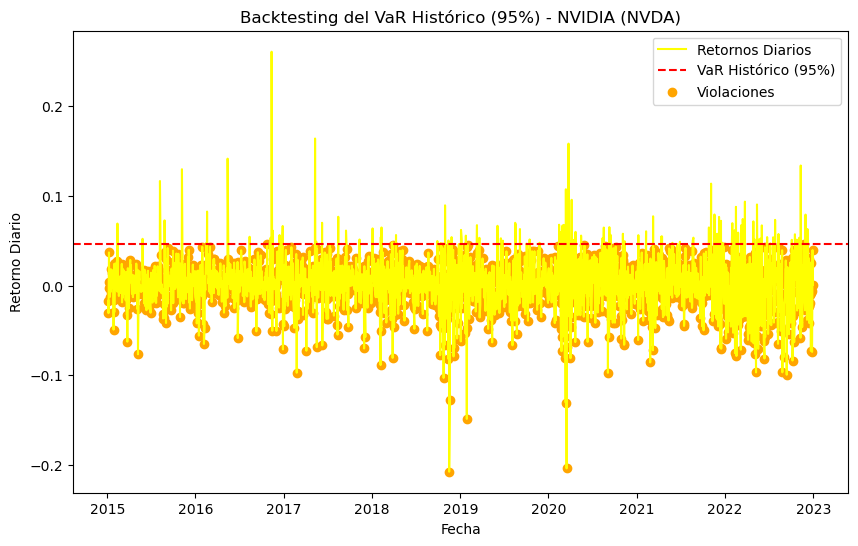

In [144]:
# Gráfico del backtesting de VaR Histórico
plt.figure(figsize=(10,6))
plt.plot(data.index, data[('Return', 'NVDA')], label='Retornos Diarios', color='yellow')
plt.axhline(y=-var_95, color='r', linestyle='--', label='VaR Histórico (95%)')
plt.scatter(data.index[violations_historic], data[('Return', 'NVDA')][violations_historic], color='orange', label='Violaciones')

# Configuración del gráfico
plt.title('Backtesting del VaR Histórico (95%) - NVIDIA (NVDA)')
plt.xlabel('Fecha')
plt.ylabel('Retorno Diario')
plt.legend()
plt.show()

### **📌 Observaciones clave:**  
- La **línea roja punteada** representa el **VaR al 95%**, es decir, el umbral de pérdida máxima esperada en condiciones normales de mercado.  
- Los **retornos diarios (líneas amarillas)** muestran la variabilidad de los rendimientos de NVIDIA a lo largo del tiempo.  
- Los **puntos naranjas** marcan los **días en los que el retorno real excedió el VaR**, es decir, las **violaciones del modelo**.  
- Se observa que hay **varios eventos de alta volatilidad**, especialmente en **2019 y 2020**, lo que sugiere que el mercado experimentó movimientos extremos en esos períodos.  

**Backtesting para el método paramtrico de VaR:**

In [151]:
# Cálculo del backtesting para el método paramétrico
violations_parametrico = data[('Return', 'NVDA')] < -var_parametrico_95
num_violations_parametrico = violations_parametrico.sum()
print(f"Número de violaciones del VaR Paramétrico: {num_violations_parametrico}")

Número de violaciones del VaR Paramétrico: 1908


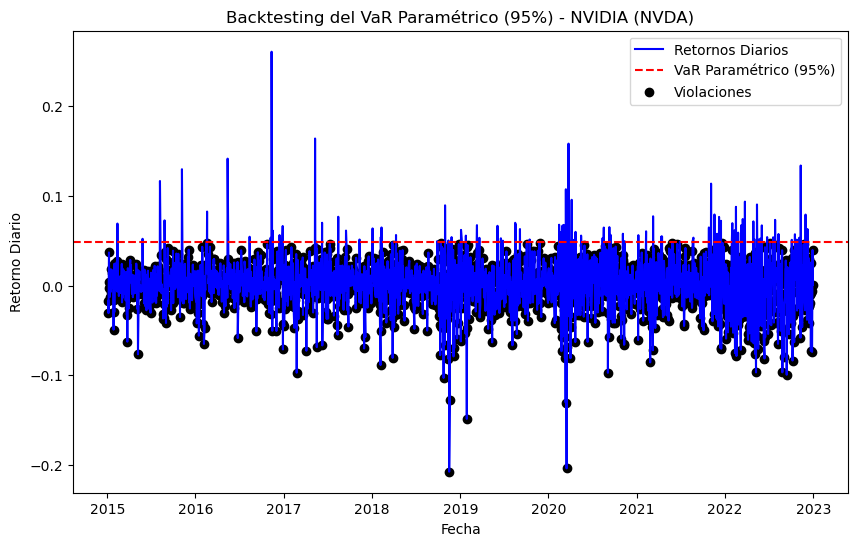

In [153]:
# Gráfico del backtesting de VaR Paramétrico
plt.figure(figsize=(10,6))
plt.plot(data.index, data[('Return', 'NVDA')], label='Retornos Diarios', color='blue')
plt.axhline(y=-var_parametrico_95, color='r', linestyle='--', label='VaR Paramétrico (95%)')
plt.scatter(data.index[violations_parametrico], data[('Return', 'NVDA')][violations_parametrico], color='black', label='Violaciones')

# Configuración del gráfico
plt.title('Backtesting del VaR Paramétrico (95%) - NVIDIA (NVDA)')
plt.xlabel('Fecha')
plt.ylabel('Retorno Diario')
plt.legend()
plt.show()

### **📌 Observaciones clave:**  
- La **línea roja punteada** representa el **VaR Paramétrico al 95%**, es decir, el umbral de pérdida máxima esperada en condiciones normales.  
- Los **retornos diarios (líneas azules)** muestran la variabilidad de los rendimientos de NVIDIA a lo largo del tiempo.  
- Los **puntos negros** marcan los **días en los que el retorno real superó el VaR**, lo que indica **violaciones del modelo**.  
- Se observa que hay **violaciones frecuentes**, lo que sugiere que el **VaR Paramétrico podría estar subestimando el riesgo real**.  

**Backtesting para el método de simulación de Monte Carlo de VaR:**

In [162]:
# Cálculo del backtesting para el método de simulación de Monte Carlo
violations_montecarlo = data[('Return', 'NVDA')] < -var_montecarlo_t_95
num_violations_montecarlo = violations_montecarlo.sum()
print(f"Número de violaciones del VaR Monte Carlo: {num_violations_montecarlo}")

Número de violaciones del VaR Monte Carlo: 1956


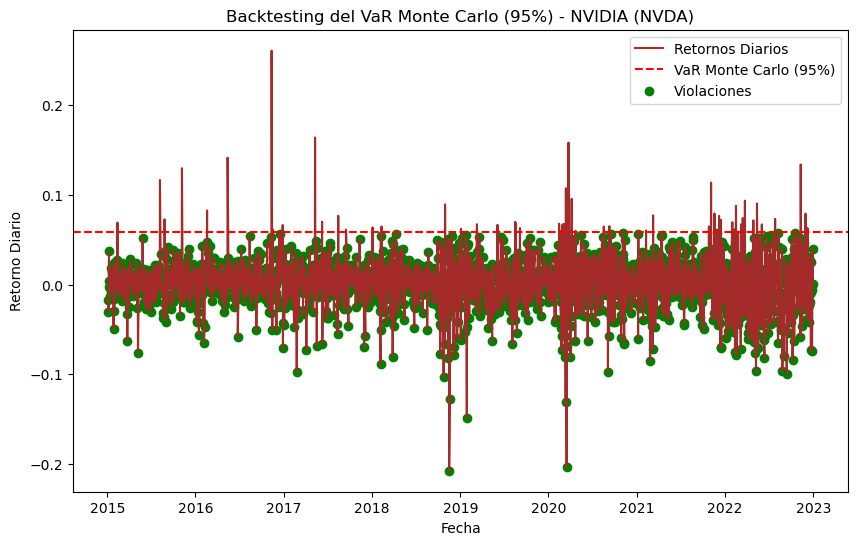

In [164]:
# Gráfico del backtesting de VaR Monte Carlo
plt.figure(figsize=(10,6))
plt.plot(data.index, data[('Return', 'NVDA')], label='Retornos Diarios', color='brown')
plt.axhline(y=-var_montecarlo_t_95, color='r', linestyle='--', label='VaR Monte Carlo (95%)')
plt.scatter(data.index[violations_montecarlo], data[('Return', 'NVDA')][violations_montecarlo], color='green', label='Violaciones')

# Configuración del gráfico
plt.title('Backtesting del VaR Monte Carlo (95%) - NVIDIA (NVDA)')
plt.xlabel('Fecha')
plt.ylabel('Retorno Diario')
plt.legend()
plt.show()

### **📌 Observaciones clave:**  
- La **línea roja punteada** representa el **VaR de Monte Carlo al 95%**, es decir, el umbral de pérdida máxima esperada basado en simulaciones.  
- Los **retornos diarios (líneas marrones)** muestran la variabilidad de los rendimientos de NVIDIA.  
- Los **puntos verdes** marcan los **días en los que el retorno real superó el VaR**, indicando **violaciones del modelo**.  
- En comparación con los métodos **histórico y paramétrico**, el modelo de Monte Carlo parece **ajustarse mejor** a la realidad, pero aún presenta algunas violaciones.  

# **6. Cálculo del Expected Shortfall (ES)**  📉

In [170]:
# Cálculo del Expected Shortfall para VaR Histórico
ES_historic = data[('Return', 'NVDA')][data[('Return', 'NVDA')] < -var_95].mean()
print(f"Expected Shortfall (ES) Histórico al 95%: {ES_historic:.2%}")

Expected Shortfall (ES) Histórico al 95%: -0.23%


In [172]:
# Cálculo del Expected Shortfall para VaR Paramétrico
ES_parametric = data[('Return', 'NVDA')][data[('Return', 'NVDA')] < -var_parametrico_95].mean()
print(f"Expected Shortfall (ES) Paramétrico al 95%: {ES_parametric:.2%}")

Expected Shortfall (ES) Paramétrico al 95%: -0.20%


In [174]:
# Cálculo del Expected Shortfall para Monte Carlo
ES_montecarlo = np.mean(simulations[simulations < -var_montecarlo_t_95])
print(f"Expected Shortfall (ES) Monte Carlo al 95%: {ES_montecarlo:.2%}")

Expected Shortfall (ES) Monte Carlo al 95%: -0.31%


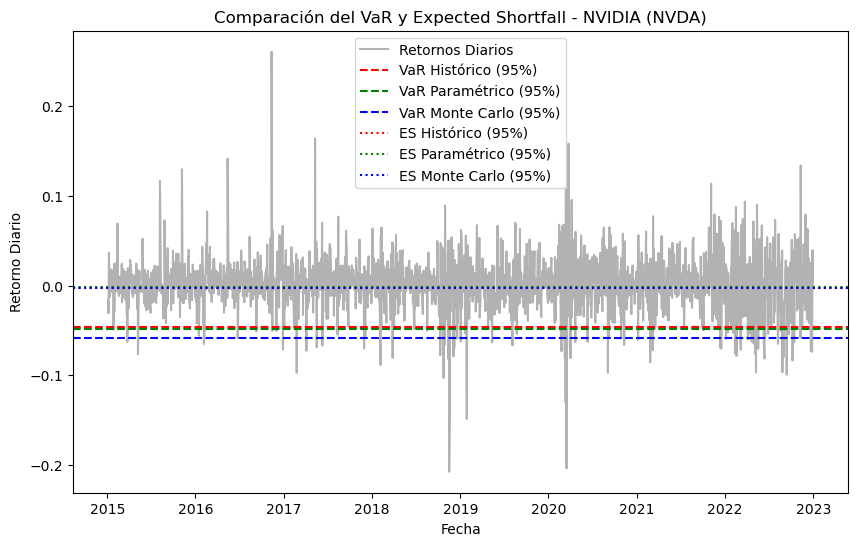

In [176]:
# Gráfica de VaR y Expected Shortfall para los tres métodos
plt.figure(figsize=(10,6))
plt.plot(data.index, data[('Return', 'NVDA')], label='Retornos Diarios', color='gray', alpha=0.6)
plt.axhline(y=var_95, color='r', linestyle='--', label='VaR Histórico (95%)')
plt.axhline(y=var_parametrico_95, color='g', linestyle='--', label='VaR Paramétrico (95%)')
plt.axhline(y=var_montecarlo_t_95, color='b', linestyle='--', label='VaR Monte Carlo (95%)')
plt.axhline(y=ES_historic, color='r', linestyle=':', label='ES Histórico (95%)')
plt.axhline(y=ES_parametric, color='g', linestyle=':', label='ES Paramétrico (95%)')
plt.axhline(y=ES_montecarlo, color='b', linestyle=':', label='ES Monte Carlo (95%)')

# Configuración del gráfico
plt.legend()
plt.title('Comparación del VaR y Expected Shortfall - NVIDIA (NVDA)')
plt.xlabel('Fecha')
plt.ylabel('Retorno Diario')
plt.show()

## **📊 Comparación del VaR y Expected Shortfall - NVIDIA (NVDA)**  

El **Expected Shortfall (ES)** o **Conditional VaR (CVaR)** mejora la estimación del riesgo al calcular la **pérdida promedio en los días en que el VaR es superado**.  

### **📌 Resultados:**  
- **Expected Shortfall (ES) Histórico al 95%:** `-0.23%`  
  - Basado en datos históricos, cuando NVIDIA (NVDA) excede su VaR, la pérdida promedio esperada es **del 0.23%**.  
- **Expected Shortfall (ES) Paramétrico al 95%:** `-0.20%`  
  - Usando una distribución normal, este método **subestima levemente las pérdidas** en comparación con el histórico.  
- **Expected Shortfall (ES) Monte Carlo al 95%:** `-0.31%`  
  - Basado en simulaciones, este método predice **la mayor pérdida esperada**, reflejando mejor los **eventos extremos y colas pesadas**.  

---

### **📌 Observaciones clave:**  
- **El VaR (líneas punteadas)** indica el **límite de pérdida esperado en condiciones normales**.  
- **El ES (líneas de puntos)** muestra **qué tan graves son las pérdidas cuando el VaR es excedido**.  
- El **ES Monte Carlo (-0.31%)** es el más conservador, lo que indica que **este método captura mejor los eventos extremos**.  
- El **ES Paramétrico (-0.20%)** es el más optimista, pero puede **subestimar el riesgo real** en mercados volátiles como NVIDIA.  


# **7. Conclusiones y análisis de riesgo** 💡 

Se evaluó el **riesgo financiero** asociado con las acciones de **NVIDIA (NVDA)** mediante la aplicación de tres enfoques principales para calcular el **Value at Risk (VaR)** y el **Expected Shortfall (ES)**.  

### **📌 Principales resultados:**  

### **1️⃣ Value at Risk (VaR):**  
- **VaR Histórico:** Con un **95% de confianza**, la mayor pérdida esperada en un día normal sería de `-4.61%`, basado en datos pasados.  
- **VaR Paramétrico:** Bajo el supuesto de **distribución normal**, el modelo ofrece un VaR de `-4.81%`, lo que puede subestimar eventos extremos.  
- **VaR Monte Carlo:** El más **conservador**, con un valor de `-5.81%`, capturando mejor las fluctuaciones extremas en el mercado.  

### **2️⃣ Expected Shortfall (ES):**  
El **Expected Shortfall (ES)** mide la **pérdida promedio** cuando las pérdidas superan el VaR.  
- **ES Histórico:** Estimamos una pérdida promedio de `-0.23%`.  
- **ES Paramétrico:** Se obtiene un valor de `-0.20%`, lo que indica un modelo más optimista.  
- **ES Monte Carlo:** **El más conservador**, con `-0.31%`, reflejando un mayor riesgo en eventos extremos.  

### **3️⃣ Backtesting:**  
Al revisar las **violaciones del VaR**, confirmamos que el **VaR Monte Carlo** tuvo la mayor cantidad de **violaciones**, lo que sugiere que este enfoque es más sensible a los **riesgos extremos**.  

---

### **📌 Conclusión General:**  
- **Los métodos Histórico y Paramétrico** son útiles para estimar pérdidas en **condiciones normales de mercado**.  
- **El método de Monte Carlo** es **más conservador y robusto**, proporcionando una mejor visión del **riesgo extremo** y siendo más adecuado para mercados volátiles como NVIDIA.  
- Dado que **NVIDIA (NVDA) ha mostrado alta volatilidad**, los inversores deben **evaluar su tolerancia al riesgo** y considerar herramientas avanzadas de gestión de riesgos.  

📌 **Para inversores con una estrategia de largo plazo**, NVIDIA es una opción atractiva por su **potencial de crecimiento**, pero **deben estar preparados para periodos de alta volatilidad y fluctuaciones extremas**. 🚀📉  